Background Reserach-

    What is humidity? - Humidity is a measure of the amount of water vapour in the air. Humidity depends on the temperature and pressure of the system of interest.

    What is temparature? - Temperature is a physical quantity that expresses hot and cold. Temperature Depends on Particle Movement!

    Wind Bearing- The direction where the wind is came.    

Difference between Temperature and Apparent Temperature:

    Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed.

Dataset Loading Process - 

In [1]:
from genericpath import isfile
import os

if os.path.isfile('weatherHistory.csv'):
    print('File Exists')
else:
    print('File does not exist')

File Exists


In [7]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

In [9]:
weather_df = pd.read_csv('weatherHistory.csv')
weather_df.shape

(96453, 12)

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [11]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


(a). Preprocess the dataset as specified in the data mining process:

    First of all we need to remove Columns That Contain a Single Value (Unique value columns). 

In [12]:
print(weather_df.nunique())

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


In [14]:
from numpy import unique

data = weather_df.to_numpy().astype(str)
for i in range(data.shape[1]):
    num = len(unique(data[:,i]))
    percentage = (float(num) / data.shape[0])* 100
    print('%s, %d, %.1f%%' % (weather_df.columns[i], num, percentage))

Formatted Date, 96429, 100.0%
Summary, 27, 0.0%
Precip Type, 3, 0.0%
Temperature (C), 7574, 7.9%
Apparent Temperature (C), 8984, 9.3%
Humidity, 90, 0.1%
Wind Speed (km/h), 2484, 2.6%
Wind Bearing (degrees), 360, 0.4%
Visibility (km), 949, 1.0%
Loud Cover, 1, 0.0%
Pressure (millibars), 4979, 5.2%
Daily Summary, 214, 0.2%


In [15]:
dropColumns = ['Formatted Date', 'Daily Summary', 'Loud Cover']
weather_df.drop(dropColumns, inplace=True, axis=1)
weather_df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [18]:
#calculates duplicates
duplicates = weather_df.duplicated()
#report if there are any duplicates
print(duplicates.any())
# list all duplicates rows
print(weather_df[duplicates])
#delete duplicate rows
weather_df.drop_duplicates(inplace=True)

True
                   Summary Precip Type  Temperature (C)  \
28410             Overcast        rain         7.222222   
28607  Breezy and Overcast        rain         1.666667   
28920        Mostly Cloudy        snow        -1.666667   
29472             Overcast        snow        -4.444444   
29473        Mostly Cloudy        snow        -5.333333   
...                    ...         ...              ...   
64544                Foggy        snow        -4.927778   
64545                Foggy        snow        -3.888889   
64546                Foggy        snow        -2.716667   
64547             Overcast        snow        -2.244444   
64548             Overcast        snow        -2.244444   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
28410                  7.222222      0.93             4.8300   
28607                 -4.177778      0.75            28.9800   
28920                 -4.105556      0.88             6.4400   
29472                 -8.96666

In [19]:
weather_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [20]:
#Removing duplicates changes the indexes so we need to reset index
weather_df = weather_df.reset_index(drop=True)
weather_df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96376,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96377,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96378,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96379,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


I). Handle Missing Values and Outliers if any

Checking Missing values-

In [21]:
weather_df.isnull().values.any()

True

In [22]:
#Getting summary of null values
weather_df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [24]:
weather_df[weather_df['Precip Type'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
52625,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,1002.40
52627,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,1001.79
52628,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,1001.60
52630,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,1001.92
52631,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,1002.20
...,...,...,...,...,...,...,...,...,...
95512,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,1021.73
95513,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,1021.76
95514,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,1021.81
95515,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,1021.83


In [25]:
# checking probability to drop/replace the missing values
(weather_df['Precip Type'].isna().sum() / len(weather_df))*100

0.5364127784521846

In [54]:
new_weather_df = weather_df.copy()
new_weather_df = new_weather_df.dropna(axis=0)
new_weather_df = new_weather_df.reset_index(drop=True)

In [55]:
new_weather_df.isnull().values.any()

False

Handling Outliers - Box Plots

<AxesSubplot:>

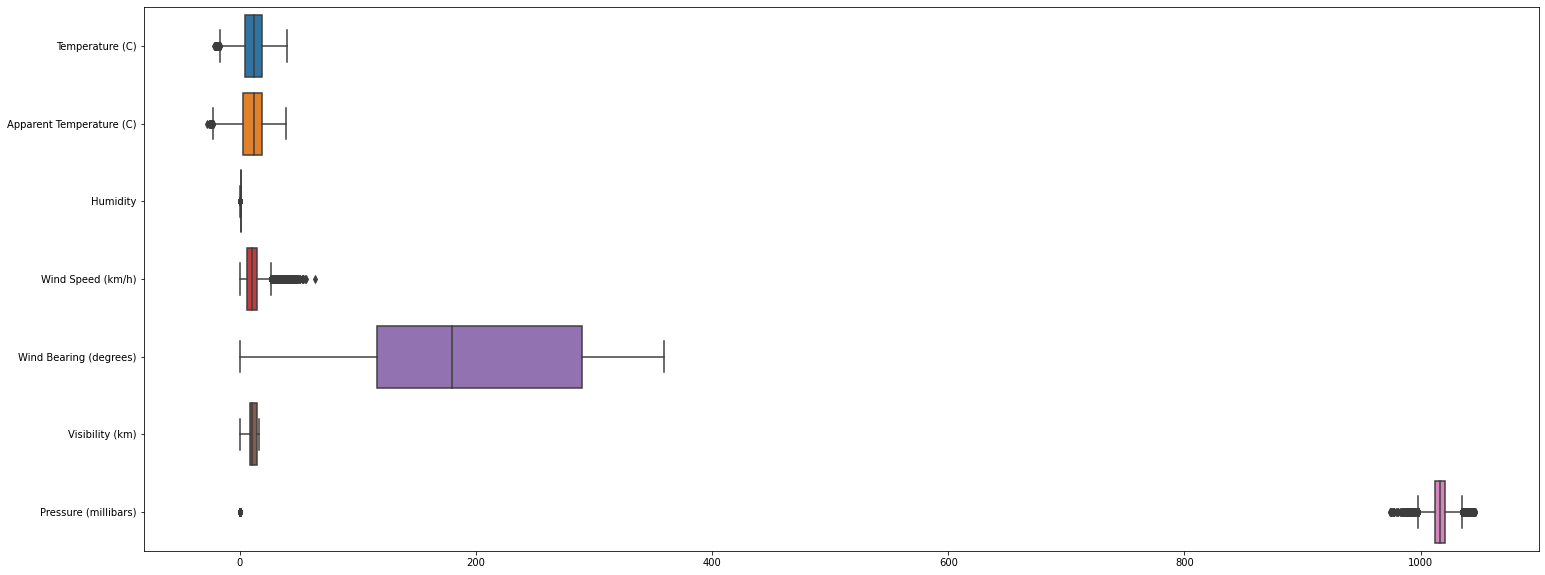

In [56]:
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=new_weather_df, orient='h',ax=ax)

<AxesSubplot:>

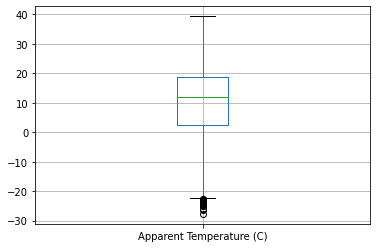

In [57]:
new_weather_df.boxplot(column=['Apparent Temperature (C)'])

<AxesSubplot:>

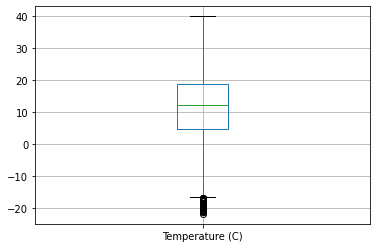

In [58]:
new_weather_df.boxplot(column=['Temperature (C)'])

<AxesSubplot:>

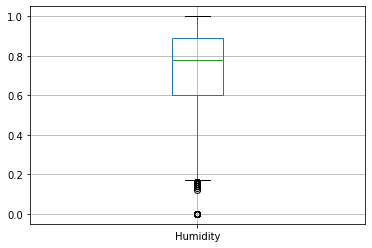

In [59]:
new_weather_df.boxplot(column=['Humidity'])

Before Shape:  (95864, 9)
After Shape:  (95842, 9)


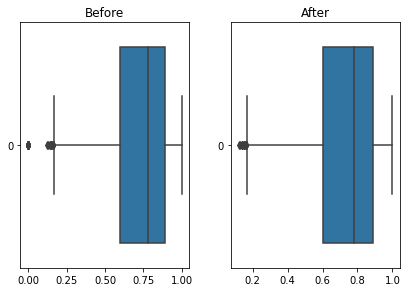

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95837,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95838,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95839,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95840,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [60]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()

print('Before Shape: ', new_weather_df.shape)

new_weather_df2 = new_weather_df[(new_weather_df['Humidity']>0.0)]
print('After Shape: ', new_weather_df2.shape)

sns.boxplot(new_weather_df['Humidity'],orient='h',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weather_df2['Humidity'],orient='h',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

new_weather_df = new_weather_df2
new_weather_df.reset_index(drop=True)

<AxesSubplot:>

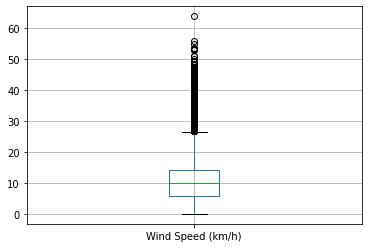

In [61]:
new_weather_df.boxplot(column=['Wind Speed (km/h)'])

Before shape: (95842, 9)
After shape:  (95841, 9)


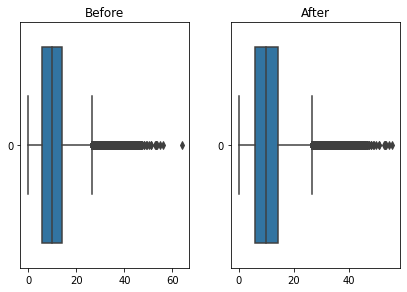

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
95836,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95837,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95838,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95839,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [62]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()

print('Before shape:', new_weather_df.shape)
new_weather_df2 = new_weather_df[(new_weather_df['Wind Speed (km/h)']<60)]
print('After shape: ', new_weather_df2.shape)

sns.boxplot(new_weather_df['Wind Speed (km/h)'], orient='h', ax=axes[0])
axes[0].set_title('Before')
sns.boxplot(new_weather_df2['Wind Speed (km/h)'], orient='h', ax=axes[1])
axes[1].set_title('After')
plt.show()

new_weather_df = new_weather_df2
new_weather_df.reset_index(drop=True)

<AxesSubplot:>

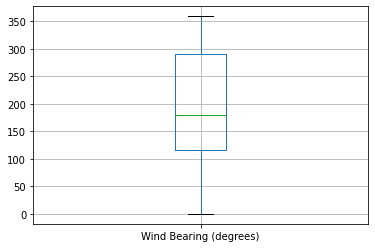

In [63]:
new_weather_df.boxplot(column=['Wind Bearing (degrees)'])

<AxesSubplot:>

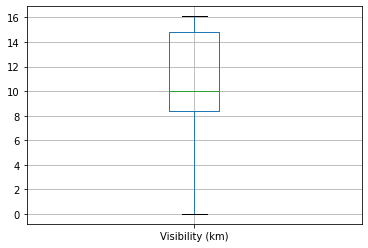

In [64]:
new_weather_df.boxplot(column=['Visibility (km)'])

<AxesSubplot:>

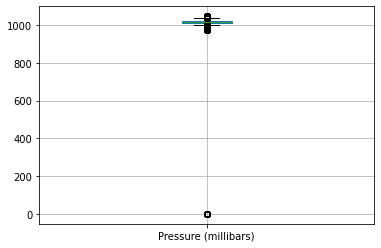

In [66]:
new_weather_df.boxplot(column=['Pressure (millibars)'])

Before shape: (95841, 9)
After shape:  (94556, 9)


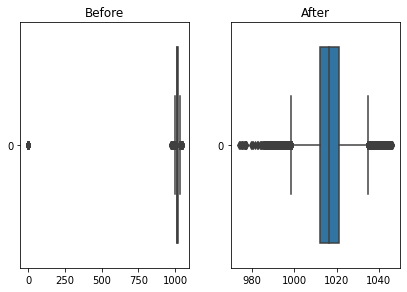

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
94551,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
94552,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
94553,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
94554,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [67]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()

print('Before shape:', new_weather_df.shape)
new_weather_df2 = new_weather_df[(new_weather_df['Pressure (millibars)']>800)]
print('After shape: ', new_weather_df2.shape)

sns.boxplot(new_weather_df['Pressure (millibars)'], orient='h', ax=axes[0])
axes[0].set_title('Before')
sns.boxplot(new_weather_df2['Pressure (millibars)'], orient='h', ax=axes[1])
axes[1].set_title('After')
plt.show()

new_weather_df = new_weather_df2
new_weather_df.reset_index(drop=True)

<AxesSubplot:>

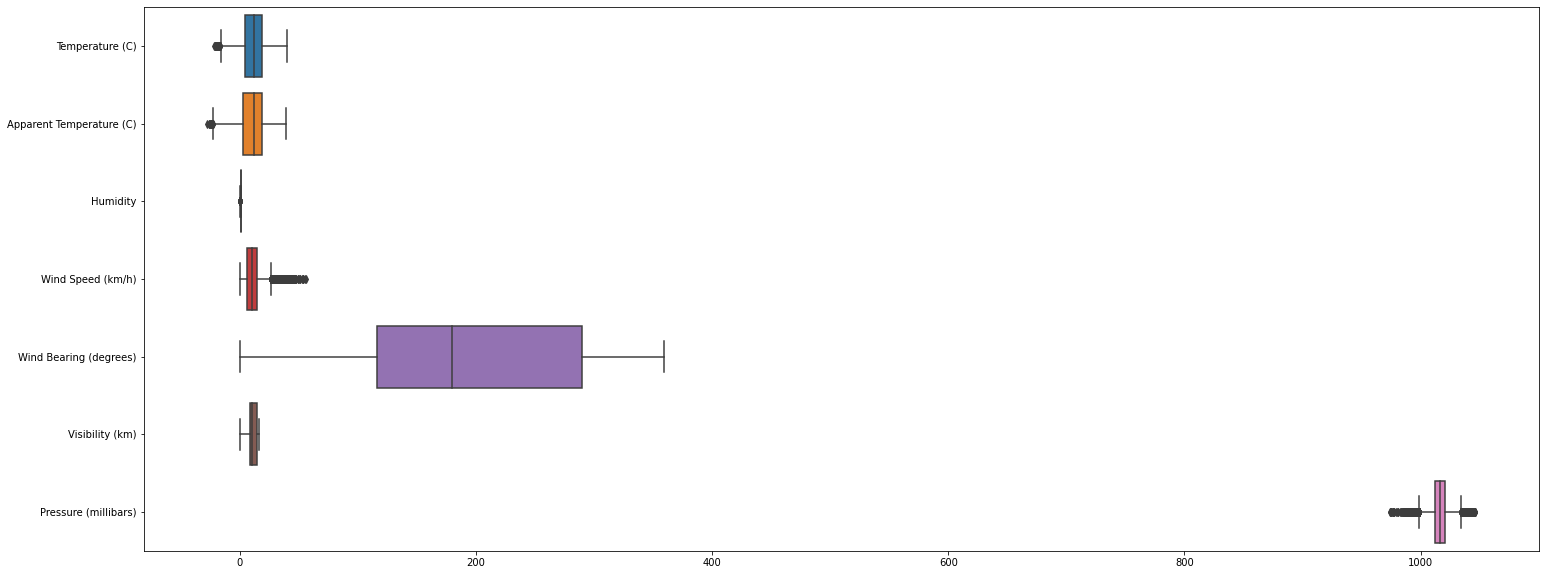

In [68]:
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=new_weather_df, orient='h', ax=ax)